

using the [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist) dataset, which contains 28x28 images of hands depicting the 26 letters of the English alphabet.

pre-process the data so that it can be fed into convolutional neural network to correctly classify each image as the letter it represents.



In [2]:
# import our require modules

import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Download the training and test sets (the test set will actually be used as a validation set):

In [5]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

C:\Users\Ryan Goh\AppData\Local\Programs\Python\Python311\Lib\site-packages\gdown\cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: c:\Users\Ryan Goh\Desktop\C2 - CNN WITH TENSORFLOW\W4\sign_mnist_train.csv

  0%|          | 0.00/83.3M [00:00<?, ?B/s]
  6%|▌         | 4.72M/83.3M [00:00<00:04, 17.3MB/s]
 10%|█         | 8.39M/83.3M [00:00<00:04, 16.3MB/s]
 13%|█▎        | 10.5M/83.3M [00:00<00:05, 12.2MB/s]
 15%|█▌        | 12.6M/83.3M [00:01<00:07, 10.0MB/s]
 18%|█▊        | 14.7M/83.3M [00:01<00:06, 10.9MB/s]
 24%|██▍       | 19.9M/83.3M [00:01<00:04, 13.9MB/s]
 26%|██▋       | 22.0M/83.3M [00:01<00:04, 12.5MB/s]
 33%|███▎      | 27.3M/83.3M [00:01<00:03, 15.5MB/s]
 35%|███▌      | 29.4M/83.3M [00:02<00:04, 12.3MB/s]
 42%|████▏     | 34.6M/83.3M [00:02<00:02, 17.9MB/s]
 47%|███

Define some globals with the path to both files downloaded:

In [6]:
#define global paths

TRAINING_FILE = './sign_mnist_train.csv'
VALIDATION_FILE = './sign_mnist_test.csv'

The data is serialized as `csv` files. Each line shows the series of pixels that are in the image

Take a look at how the data looks like within the `csv` file:

In [7]:


with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

As you can see, each file includes a header (the first line) and each subsequent data point is represented as a line that contains 785 values.

The first value is the label (the numeric representation of each letter) and the other 784 values are the value of each pixel of the image. Remember that the original images have a resolution of 28x28, which sums up to 784 pixels.

 ## Parsing the dataset


 The `parse_data_from_input` function should be able to read a file passed as input and return 2 numpy arrays, one containing the labels and one containing the 28x28 representation of each image within the file. These numpy arrays should have type `float64`.

 A couple of things to keep in mind:

- The first line contains the column headers, so we should ignore it.

- Each successive line contains 785 comma-separated values between 0 and 255
  - The first value is the label

  - The rest are the pixel values for that picture


In [8]:


# parse_data_from_input
def parse_data_from_input(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:
    #create a master list for all labels and images
    labels = []
    images = []
    # Use csv.reader, passing in the appropriate delimiter
    #  csv.reader can be iterated and returns one line in each iteration
    csv_reader = csv.reader(file, delimiter=',')
    #skip the first row
    next(csv_reader)
    for row in csv_reader:

      label = row[0]
      image = row[1:]
      #reshape the array of the images into a 28 by 28 tensor
      image = np.reshape(image,(28,28))
      #append image to images
      images.append(image)
      #append to labels
      labels.append(label)

  #convert labels and images to an array
  #also convert to the appropriate type
  images = np.array(images,dtype=float)
  labels = np.array(labels).astype(float)



  return images, labels

In [9]:


# Test our function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


## Visualizing the numpy arrays

now lets see how our sample images look like


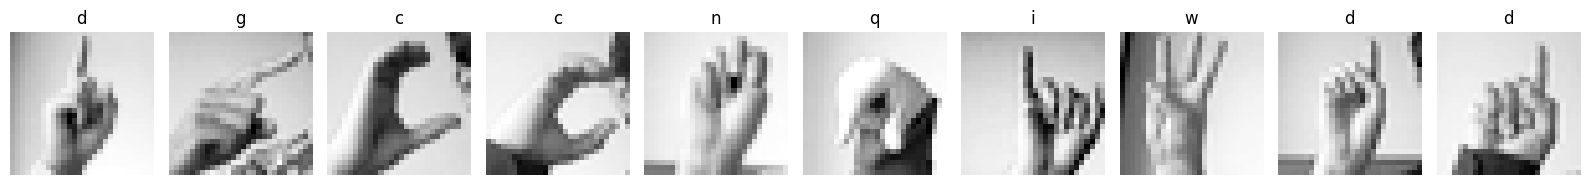

In [10]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

## Creating the generators for the CNN

Now that we have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time to code the generators that will yield batches of images, both for training and validation. 

For this we will write the code `train_val_generators` function.

Some important notes:

- we use the [`flow`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) method.
- we will need to add the "color" dimension to the numpy arrays that encode the images. These are black and white images, so this new dimension should have a size of 1 (instead of 3, which is used when dealing with colored images). 

In [42]:

#train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # In this section we will have to add another dimension to the data
  # So, for example, if our array is (10000, 28, 28)
  # We will need to make it (10000, 28, 28, 1)
  training_images = np.expand_dims(training_images,axis=-1)
  validation_images = np.expand_dims(validation_images,axis=-1)

  # Instantiate the ImageDataGenerator class
  # Don't forget to normalize pixel values
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)


  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)


  return train_generator, validation_generator

In [43]:


# Test generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## Coding the CNN

One last step before training is to define the architecture of the model.

The `create_model` function should return a Keras' model that uses the `Sequential` or the `Functional` API.

The last layer of your model should have a number of units equal to the number of letters in the English alphabet. It should also use an activation function that will output the probabilities per letter.

Aside from defining the architecture of the model, we also compile it so make sure to use a `loss` function that is suitable for multi-class classification.


In [44]:

from tensorflow.keras.optimizers import RMSprop
def create_model():

  ### START CODE HERE

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])


  #use optimizer = 'adam' if categorical
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [45]:
# Save our model
model = create_model()

# Train our model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 18s 19ms/step - loss: 2.3776 - accuracy: 0.2731 - val_loss: 1.1066 - val_accuracy: 0.6241
Epoch 2/15
858/858 [==============================] - 13s 15ms/step - loss: 1.3918 - accuracy: 0.5453 - val_loss: 0.6946 - val_accuracy: 0.7419
Epoch 3/15
858/858 [==============================] - 13s 15ms/step - loss: 0.9768 - accuracy: 0.6758 - val_loss: 0.5097 - val_accuracy: 0.7936
Epoch 4/15
858/858 [==============================] - 13s 15ms/step - loss: 0.7634 - accuracy: 0.7448 - val_loss: 0.3424 - val_accuracy: 0.8733
Epoch 5/15
858/858 [==============================] - 13s 15ms/step - loss: 0.6108 - accuracy: 0.7957 - val_loss: 0.2879 - val_accuracy: 0.8938
Epoch 6/15
858/858 [==============================] - 13s 16ms/step - loss: 0.5135 - accuracy: 0.8253 - val_loss: 0.1942 - val_accuracy: 0.9324
Epoch 7/15
858/858 [==============================] - 13s 15ms/step - loss: 0.4437 - accuracy: 0.8524 - val_loss: 0.1501 - val_accuracy:

Now take a look at our training history:

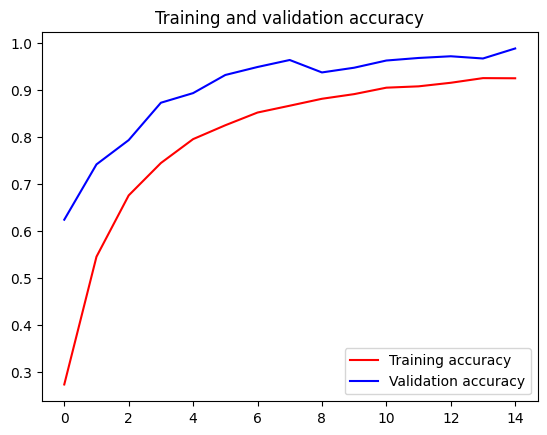

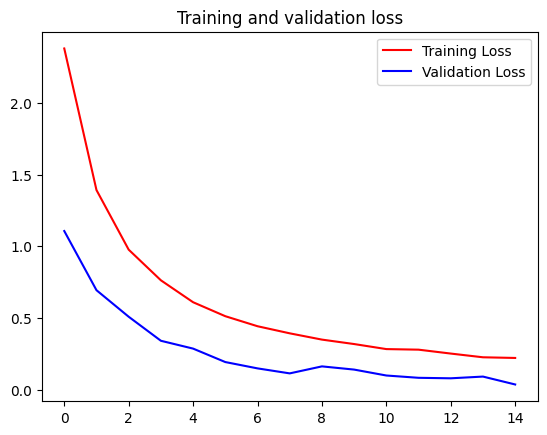

In [46]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()